### Import Libraries

In [1]:
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime
import seaborn as sns

In [28]:
def pivot_dummy (table, gran_col, dummy_col, dummypivot_col, dummypivot_agg, dependent_var, dependent_agg):
    
    df_bygran = table.groupby(by= gran_col).agg({dependent_var:dependent_agg})
    df_bygran = df_bygran.reset_index()
    
    dummies = df.groupby(by=[gran_col,dummy_col]).agg({dummypivot_col:dummypivot_agg})
    dummies = dummies.reset_index()
    if is_datetime(df[gran_col]):
        dummies[gran_col] = pd.to_datetime(dummies[gran_col])
    dummies = dummies[[gran_col,dummy_col,dummypivot_col]]
    dummies = dummies.pivot(index=gran_col, columns=dummy_col, values=dummypivot_col)
    dummies = dummies.fillna(0)
    dummies = dummies.reset_index()

    table_corr_graph = df_bygran[[gran_col,dependent_var]].join(dummies.set_index(gran_col), on=gran_col)
    corr_graph = sns.pairplot(data=table_corr_graph, x_vars=[dependent_var],height=3)
    print('Table Variable Name: table_corr_graph')
    print(' ')
    print('Graph Variable Name: corr_graph')
    print('---------------------------------')  
    print('') 
    print('Correlation Graphs') 
    return(corr_graph,table_corr_graph)

### Examples

In [29]:
###load example dataset
df = pd.read_csv('sampleorderdata.csv')
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

Table Variable Name: table_corr_graph
 
Graph Variable Name: corr_graph
---------------------------------

Correlation Graphs


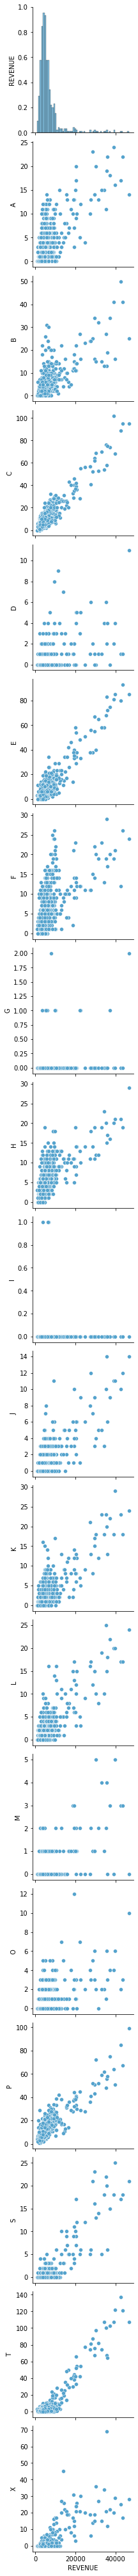

In [30]:
### Example with date granularity
corr_graph, table_corr_graph = pivot_dummy(df,'ORDER_DATE','PRODUCT_CATEGORY_ID','QUANTITY',sum,'REVENUE',sum)

In [31]:
table_corr_graph.head()

,ORDER_DATE,REVENUE,A,B,C,D,E,F,G,H,I,J,K,L,M,O,P,S,T,X
0,2011-01-01,2119.35,1.0,2.0,4.0,1.0,5.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,1.0,6.0,0.0
1,2011-01-02,3419.75,5.0,2.0,4.0,0.0,3.0,1.0,0.0,12.0,0.0,0.0,3.0,0.0,0.0,0.0,9.0,1.0,5.0,0.0
2,2011-01-03,8255.00,4.0,3.0,11.0,1.0,20.0,7.0,0.0,10.0,0.0,3.0,3.0,6.0,0.0,2.0,27.0,0.0,3.0,0.0
3,2011-01-04,6716.15,6.0,2.0,8.0,0.0,11.0,1.0,0.0,8.0,0.0,1.0,0.0,2.0,1.0,0.0,33.0,0.0,4.0,0.0
4,2011-01-05,3826.90,3.0,4.0,7.0,0.0,2.0,1.0,0.0,7.0,0.0,1.0,2.0,1.0,1.0,0.0,11.0,1.0,1.0,0.0


Table Variable Name: table_corr_graph
 
Graph Variable Name: corr_graph
---------------------------------

Correlation Graphs


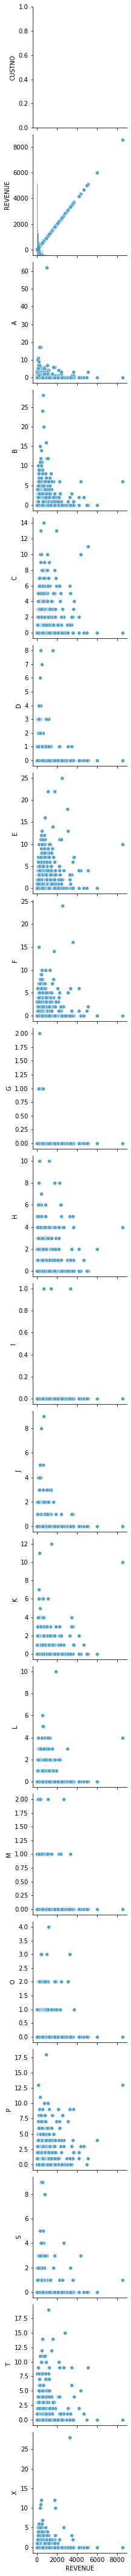

In [32]:
### Example with customer granularity
corr_graph, table_corr_graph = pivot_dummy(df,'CUSTNO','PRODUCT_CATEGORY_ID','QUANTITY',sum,'REVENUE',sum)

In [33]:
table_corr_graph.head()

,CUSTNO,REVENUE,A,B,C,D,E,F,G,H,I,J,K,L,M,O,P,S,T,X
0,9991202430,159.90,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9991220308,179.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
2,9991286681,369.80,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9991287424,564.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
4,9991358331,219.85,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
